In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurar estilo
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Rutas de archivos
results_path = os.path.abspath(os.path.join("..", "results_docker"))
csv_path = os.path.join(results_path, "docker_scenarios_results.csv")

# Cargar datos
df_vm = pd.read_csv(csv_path)
df_vm['timestamp'] = pd.to_datetime(df_vm['timestamp'], format="%Y%m%d_%H%M%S")

# Mostrar últimos resultados
display(df_vm.tail())

,timestamp,test_type,cpu_percent,memory_mb,execution_time_sec,source
4,2025-05-18 18:10:20,memory_large,100.00,5.86,1.30,Docker
5,2025-05-18 18:10:21,disk_write,38.24,6.70,1.35,Docker
6,2025-05-18 18:10:22,disk_read,99.65,7.57,1.30,Docker
7,2025-05-18 18:10:22,network_download,35.61,7.18,0.12,Docker
8,2025-05-18 18:10:27,process_spawn,1.47,9.75,5.03,Docker


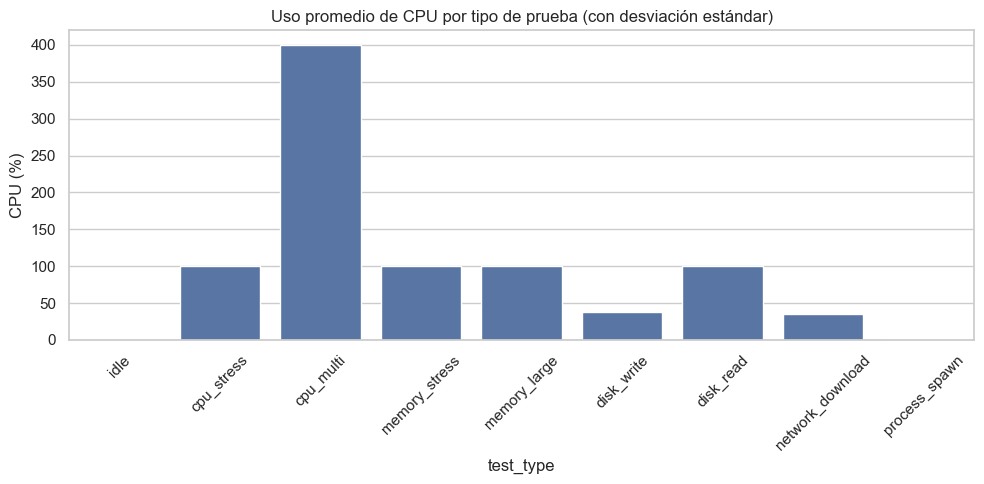

In [2]:
plt.figure()
sns.barplot(data=df_vm, x="test_type", y="cpu_percent", errorbar='sd', capsize=0.1)
plt.title("Uso promedio de CPU por tipo de prueba (con desviación estándar)")
plt.ylabel("CPU (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
plt.figure()
sns.barplot(data=df_vm, x="test_type", y="memory_percent", errorbar='sd', capsize=0.1)
plt.title("Uso promedio de Memoria por tipo de prueba (con desviación estándar)")
plt.ylabel("Memoria (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `memory_percent` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.figure()
sns.barplot(data=df_vm, x="test_type", y="execution_time_sec", errorbar='sd', capsize=0.1)
plt.title("Tiempo promedio de ejecución por prueba (con desviación estándar)")
plt.ylabel("Tiempo (segundos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
grouped = df_vm.groupby("test_type").agg({
    "cpu_percent": ['mean', 'std'],
    "memory_percent": ['mean', 'std'],
    "execution_time_sec": ['mean', 'std']
}).round(2)

# Renombrar columnas para legibilidad
grouped.columns = ['CPU_mean', 'CPU_std', 'Mem_mean', 'Mem_std', 'Time_mean', 'Time_std']
display(grouped.sort_values("CPU_mean", ascending=False))